# 안녕하세요^^ 
## '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구 별 유동인구 데이터" 를 확인해 보도록 하겠습니다

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.2 seoul_moving_month_4.csv

[데이터 소개]
* 서울 시 구별 이동 2022년 4월 데이터

[변수 소개]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 'seoul_moving_month_4_step1.csv' 데이터를 확인하세요.
    * 아래에 'Pandas'를 Import하고 'seoul_moving_month_4_step1.csv'파일을 'seoul_moving'에 불러오고,  Shape을 확인하는 소스코드를 작성하고 실행해보세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요
        * index column은 0번 열 입니다

In [1]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd

seoul_moving = pd.read_csv('1.2 seoul_moving_month_4.csv',sep=",", index_col = 0, encoding = 'UTF-8')

In [2]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_moving.shape

(28923054, 10)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.head(10)

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95
5,202204,일,0,11010,11010,F,10,WH,10,17.89
6,202204,일,0,11010,11010,F,15,EH,10,114.23
7,202204,일,0,11010,11010,F,15,HH,20,20.07
8,202204,일,0,11010,11010,F,15,HE,10,8.03
9,202204,일,0,11010,11010,F,15,HW,10,8.04


In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.4+ GB


In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,28923054.0,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07
mean,202204.0,1.365597e+01,1.712362e+04,1.719750e+04,4.279614e+01,3.279829e+01
std,0.0,5.849675e+00,9.046478e+03,9.063818e+03,1.777485e+01,2.584213e+01
min,202204.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+01
25%,202204.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,2.000000e+01
50%,202204.0,1.400000e+01,1.120000e+04,1.120000e+04,4.500000e+01,3.000000e+01
75%,202204.0,1.800000e+01,3.101400e+04,3.102100e+04,5.500000e+01,4.000000e+01
max,202204.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,7.700000e+02


* 1번 열의 의미
    * " 2022년 1월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 H(야간상주지(집))으로 이동한 0 ~ 10세 여성은 총 27.52명이며 이들의 평균 이동시간은 10분이다

#### [실습문제3] 결측치 처리 ( NaN이 아닌 결측치를 처리 해봅시다)

* '인구이동(합)' column은 이동 인구의 합산인데 object 타입입니다. 

    - 왜 일까요? 

    - Tip! (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리)

    - 해당 값을 나름의 기준으로 변경하세요

    - '인구이동(합)' 컬럼의 데이터 타입을 수치형으로 변경하세요 

# 1. 0~3 사이의 랜덤값으로 대체

In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import numpy as np
a=seoul_moving[seoul_moving['이동인구(합)']=='*']
# 0~3 사이의 랜덤 값 생성
n=np.random.uniform(0.01,3.00,len(a))
for i in range(len(n)):
    n[i]=round(n[i],2)

In [7]:
# 결측치 치환
seoul_moving1=seoul_moving.replace({'*':n})

In [8]:
# 결측치 없음 확인
seoul_moving1[seoul_moving1['이동인구(합)']=='*']

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)


In [9]:
# 이동인구(합) column의 데이터 타입을 바꿔주세요
seoul_moving1['이동인구(합)']=seoul_moving1['이동인구(합)'].astype(dtype=float)
seoul_moving1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.4+ GB


In [10]:
seoul_moving1.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분),이동인구(합)
count,28923054.0,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07
mean,202204.0,1.365597e+01,1.712362e+04,1.719750e+04,4.279614e+01,3.279829e+01,2.417014e+01
std,0.0,5.849675e+00,9.046478e+03,9.063818e+03,1.777485e+01,2.584213e+01,1.021694e+02
min,202204.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+01,1.000000e-02
25%,202204.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,2.000000e+01,3.310000e+00
50%,202204.0,1.400000e+01,1.120000e+04,1.120000e+04,4.500000e+01,3.000000e+01,6.530000e+00
75%,202204.0,1.800000e+01,3.101400e+04,3.102100e+04,5.500000e+01,4.000000e+01,1.579000e+01
max,202204.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,7.700000e+02,1.466546e+04


# 2. 최빈값과 평균값을 알 수 없는 상황이라 중위값으로 대체(사용)

In [11]:
import numpy as np
# 중위값 계산을 위해 결측치가 없는 행만 추출
seoul_moving2=seoul_moving[seoul_moving['이동인구(합)']!='*']
seoul_moving2[seoul_moving2['이동인구(합)']=='*']

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)


In [12]:
# 중위값 계산을 위해 실수형으로 변경
seoul_moving2['이동인구(합)']=seoul_moving2['이동인구(합)'].astype(dtype=float)
seoul_moving2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25081013 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.1+ GB


C:\Users\PC\AppData\Local\Temp\ipykernel_19168\1102706856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_moving2['이동인구(합)']=seoul_moving2['이동인구(합)'].astype(dtype=float)


In [13]:
# 결측치 대체
mid=seoul_moving2['이동인구(합)'].median()
seoul_moving3=seoul_moving.replace({'*':mid})
seoul_moving3[seoul_moving3['이동인구(합)']=='*']
# 결측치 대체 확인

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)


In [14]:
seoul_moving3['이동인구(합)']=seoul_moving3['이동인구(합)'].astype(dtype=float)
seoul_moving3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.4+ GB


In [15]:
# seoul_moving1과 비교했을 때 min,25%,50% 값에서 차이를 보임
seoul_moving3.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분),이동인구(합)
count,28923054.0,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07
mean,202204.0,1.365597e+01,1.712362e+04,1.719750e+04,4.279614e+01,3.279829e+01,2.504487e+01
std,0.0,5.849675e+00,9.046478e+03,9.063818e+03,1.777485e+01,2.584213e+01,1.019992e+02
min,202204.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+01,3.000000e+00
25%,202204.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,2.000000e+01,4.640000e+00
50%,202204.0,1.400000e+01,1.120000e+04,1.120000e+04,4.500000e+01,3.000000e+01,8.090000e+00
75%,202204.0,1.800000e+01,3.101400e+04,3.102100e+04,5.500000e+01,4.000000e+01,1.579000e+01
max,202204.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,7.700000e+02,1.466546e+04


#### [실습문제4] 이동유형, 요일, 성별 변수의 value수를 파악

* 역시나 value_counts()를 활용해 봅시다.

In [16]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 주간,야간상주지를 제외한 곳에서 야간상주지로 이동한 경우가 가장 많음
seoul_moving3['이동유형'].value_counts()

EH    5757073
HE    5520005
EE    5085099
WH    3108026
WE    2809148
HW    2695189
EW    2304535
WW    1026134
HH     617845
Name: 이동유형, dtype: int64

In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 평균으로 계산 시 목요일 값이 가장 많음
week=seoul_moving3['요일'].value_counts()
week['일']=week['일']//4
week['월']=week['월']//4
week['화']=week['화']//4
week['수']=week['수']//4
week['목']=week['목']//4
week['금']=week['금']//5
week['토']=week['토']//5
week.sort_values(ascending=False)


목    1002822
수     988911
화     981719
월     976568
일     947570
토     938161
금     928376
Name: 요일, dtype: int64

In [18]:
# 단순 계산 시 토요일 값이 가장 많음
seoul_moving3['요일'].value_counts().sort_values(ascending=False)

토    4690806
금    4641881
목    4011291
수    3955646
화    3926876
월    3906272
일    3790282
Name: 요일, dtype: int64

In [19]:
# 남성 값이 여성 값보다 많음
seoul_moving3['성별'].value_counts()

M    16355029
F    12568025
Name: 성별, dtype: int64

* 4월의 요일 수를 알려드릴게요
    * 일 : 4, 월 : 4, 화 : 4, 수 : 4, 목 : 4, 금 : 5, 토 : 5

#### [실습문제5] 어느 요일의 심야 이동이 가장 많을까요?

In [20]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 심야 시간을 0 ~ 4시라고 가정
night_moving=seoul_moving3.query('도착시간 in [0,1,2,3,4]')
night_moving.nunique()

대상연월               1
요일                 7
도착시간               5
출발 시군구 코드         91
도착 시군구 코드         91
성별                 2
나이                16
이동유형               9
평균 이동 시간(분)       68
이동인구(합)        24629
dtype: int64

In [21]:
# 토요일이 심야 이동이 가장 많음, 불금 때문
night_moving.groupby(['요일'])['이동인구(합)'].sum().sort_values(ascending=False)

요일
토    5800730.94
금    4675204.37
일    4027938.49
목    3726660.90
수    3610585.58
화    3431543.10
월    2923249.85
Name: 이동인구(합), dtype: float64

#### [실습문제6] 서울 지역의 데이터만 골라 보도록 하겠습니다.

* 우리는 서울시의 데이터만 필요합니다!

* 출발과 도착이 모두 서울인 데이터만 추출해 주세요.

In [22]:
# 출발이 서울인 행 추출
start=seoul_moving3['출발 시군구 코드'].isin([11010,11020,11030,11040,11050,11060,11070,11080,11090,11100,11110,11120,11130,11140,11150,11160,
                                 11170,11180,11190,11200,11210,11220,11230,11240,11250 ])
# 도착이 서울인 행 추출
end=seoul_moving3['도착 시군구 코드'].isin([11010,11020,11030,11040,11050,11060,11070,11080,11090,11100,11110,11120,11130,11140,11150,11160,
                                 11170,11180,11190,11200,11210,11220,11230,11240,11250 ])

In [23]:
# 출발과 도착이 서울인 행 추출
only_seoul=start&end
seoul=seoul_moving3[only_seoul]
seoul.head(30)

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95
5,202204,일,0,11010,11010,F,10,WH,10,17.89
6,202204,일,0,11010,11010,F,15,EH,10,114.23
7,202204,일,0,11010,11010,F,15,HH,20,20.07
8,202204,일,0,11010,11010,F,15,HE,10,8.03
9,202204,일,0,11010,11010,F,15,HW,10,8.04


In [24]:
# 출발,도착 시군구 코드 25개 확인
seoul.nunique()

대상연월                1
요일                  7
도착시간               24
출발 시군구 코드          25
도착 시군구 코드          25
성별                  2
나이                 16
이동유형                9
평균 이동 시간(분)        30
이동인구(합)        135434
dtype: int64

#### [실습문제7] 서울지역의 구 별로 groupby하여 데이터를 확인하겠습니다 (유동인구 기준)

* 유출이 제일 많은 구는?

* 유입이 제일 많은 구는?

* 유출이 제일 적은 구는?

* 유입이 제일 적은 구는?

* 참고자료 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

<AxesSubplot:xlabel='출발 시군구 코드'>

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning

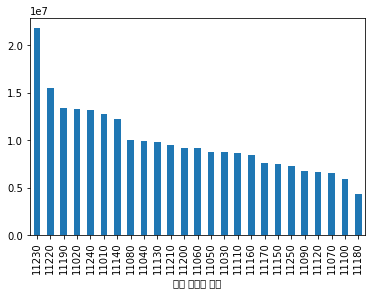

In [25]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 유츌 = 출발 시군구 코드가 해당 구
# 유입 = 도착 시군구 코드가 해당 구

# 유입과 유츌 둘 다 아닌 행을 제외하고 추출
seoul_move=seoul[seoul['출발 시군구 코드']!=seoul['도착 시군구 코드']]

# 유출
seoul_move.groupby(['출발 시군구 코드'])['이동인구(합)'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='도착 시군구 코드'>

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

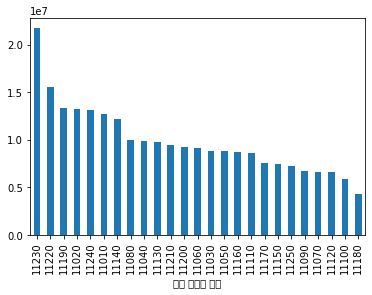

In [26]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 유입
seoul_move.groupby(['도착 시군구 코드'])['이동인구(합)'].sum().sort_values(ascending=False).plot(kind='bar')

#### [실습문제8] 낮시간만 볼게요 심야버스 제외하겠습니다

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [27]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_day=seoul.query('도착시간 !=[0,1,2,3,4]')
seoul_day.nunique()
# 서울의 낮 유동인구 데이터
# 24 - 5(0~4) = 19

대상연월                1
요일                  7
도착시간               19
출발 시군구 코드          25
도착 시군구 코드          25
성별                  2
나이                 16
이동유형                9
평균 이동 시간(분)        30
이동인구(합)        135251
dtype: int64

In [28]:
seoul_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9555938 entries, 0 to 920414
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 802.0+ MB


In [29]:
seoul_day.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,5,11010,11010,F,10,HE,10,5.96
1,202204,일,5,11010,11010,F,10,WH,10,5.88
2,202204,일,5,11010,11010,F,15,HE,10,4.06
3,202204,일,5,11010,11010,F,15,EW,10,4.06
4,202204,일,5,11010,11010,F,15,EH,10,10.08


<AxesSubplot:xlabel='도착 시군구 코드'>

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

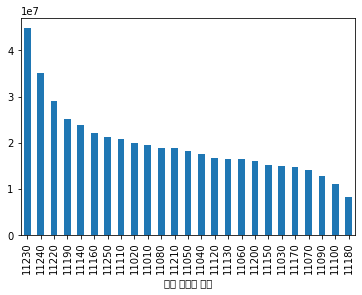

In [30]:
# 서울 낮 시간의 구별 유입인구 수
seoul_day.groupby(['도착 시군구 코드'])['이동인구(합)'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='출발 시군구 코드'>

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning

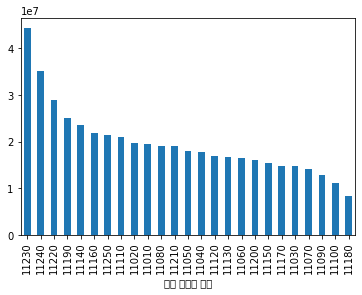

In [31]:
# 서울 낮 시간의 구별 유출인구 수
seoul_day.groupby(['출발 시군구 코드'])['이동인구(합)'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='나이'>

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


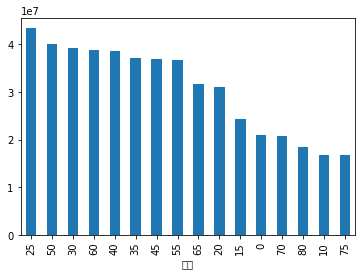

In [32]:
# 서울 낮 시간의 구별 나이에 따른 이동인구 수
seoul_day.groupby('나이')['이동인구(합)'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='성별'>

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


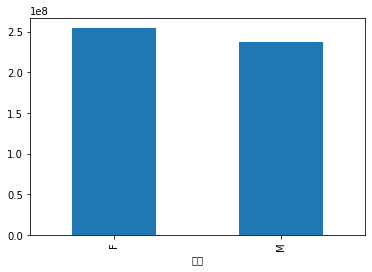

In [33]:
# 서울 낮 시간의 구별 성별에 따른 이동인구 수
seoul_day.groupby('성별')['이동인구(합)'].sum().sort_values(ascending=False).plot(kind='bar')

#### [실습문제9] '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균 과 합을 구해보겠습니다

* groupby 사용, as_index=False로 설정해주세요

In [34]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
a=seoul_day.groupby(['도착 시군구 코드'],as_index=False)
time_mean=a['평균 이동 시간(분)'].mean()
time_sum=a['평균 이동 시간(분)'].sum()
people_mean=a['이동인구(합)'].mean()
people_sum=a['이동인구(합)'].sum()

In [35]:
# 파일을 합쳐볼까요
time=pd.merge(time_mean,time_sum,how='inner',on='도착 시군구 코드')
people=pd.merge(people_mean,people_sum,how='inner',on='도착 시군구 코드')
df_seoul_moving=pd.merge(time,people,how='inner',on='도착 시군구 코드')
df_seoul_moving.head()

,도착 시군구 코드,평균 이동 시간(분)_x,평균 이동 시간(분)_y,이동인구(합)_x,이동인구(합)_y
0,11010,21.349599,9356120,44.660701,19571837.56
1,11020,21.012462,9306020,44.932366,19899691.04
2,11030,21.364786,8514380,37.373125,14894087.30
3,11040,21.740324,8887140,43.141640,17635698.46
4,11050,22.474283,8625540,47.249420,18134138.44


In [36]:
df_seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   도착 시군구 코드      25 non-null     int64  
 1   평균 이동 시간(분)_x  25 non-null     float64
 2   평균 이동 시간(분)_y  25 non-null     int64  
 3   이동인구(합)_x      25 non-null     float64
 4   이동인구(합)_y      25 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.2 KB


In [37]:
# 시군구 코드를 구 이름으로 변경
df_seoul_moving['자치구']=df_seoul_moving['도착 시군구 코드']
df_seoul_moving['자치구']

0     11010
1     11020
2     11030
3     11040
4     11050
5     11060
6     11070
7     11080
8     11090
9     11100
10    11110
11    11120
12    11130
13    11140
14    11150
15    11160
16    11170
17    11180
18    11190
19    11200
20    11210
21    11220
22    11230
23    11240
24    11250
Name: 자치구, dtype: int64

In [38]:
df_seoul_moving['자치구']=df_seoul_moving['자치구'].map({
11010 :'종로구',
11020 :'중구',
11030 :'용산구',
11040 :'성동구',
11050 :'광진구',
11060 :'동대문구',
11070 :'중랑구',
11080 :'성북구',
11090 :'강북구',
11100 :'도봉구',
11110 :'노원구',
11120 :'은평구',
11130 :'서대문구',
11140 :'마포구',
11150 :'양천구',
11160 :'강서구',
11170 :'구로구',
11180 :'금천구',
11190 :'영등포구',
11200 :'동작구',
11210 :'관악구',
11220 :'서초구',
11230 :'강남구',
11240 :'송파구',
11250 :'강동구'})
df_seoul_moving

,도착 시군구 코드,평균 이동 시간(분)_x,평균 이동 시간(분)_y,이동인구(합)_x,이동인구(합)_y,자치구
0,11010,21.349599,9356120,44.660701,19571837.56,종로구
1,11020,21.012462,9306020,44.932366,19899691.04,중구
2,11030,21.364786,8514380,37.373125,14894087.30,용산구
3,11040,21.740324,8887140,43.141640,17635698.46,성동구
4,11050,22.474283,8625540,47.249420,18134138.44,광진구
5,11060,21.673451,8838130,40.418019,16481902.36,동대문구
6,11070,23.412789,7939300,41.594075,14104592.26,중랑구
7,11080,22.160283,9072420,46.301364,18955778.59,성북구
8,11090,23.811274,7649610,39.719921,12760421.77,강북구
9,11100,24.489976,6995880,38.506211,10999799.89,도봉구


In [39]:
# 열 이름 변경
df_seoul_moving.rename(columns={'평균 이동 시간(분)_x':'평균 이동 시간(분)','평균 이동 시간(분)_y':'총 이동 시간(분)',
                               '이동인구(합)_x':'이동인구(평균)','이동인구(합)_y':'이동인구(합)'}, inplace=True)

In [40]:
df_seoul_moving.head()

,도착 시군구 코드,평균 이동 시간(분),총 이동 시간(분),이동인구(평균),이동인구(합),자치구
0,11010,21.349599,9356120,44.660701,19571837.56,종로구
1,11020,21.012462,9306020,44.932366,19899691.04,중구
2,11030,21.364786,8514380,37.373125,14894087.30,용산구
3,11040,21.740324,8887140,43.141640,17635698.46,성동구
4,11050,22.474283,8625540,47.249420,18134138.44,광진구


In [41]:
df_seoul_moving=df_seoul_moving.drop('도착 시군구 코드',axis=1)

In [42]:
df_seoul_moving.head()

,평균 이동 시간(분),총 이동 시간(분),이동인구(평균),이동인구(합),자치구
0,21.349599,9356120,44.660701,19571837.56,종로구
1,21.012462,9306020,44.932366,19899691.04,중구
2,21.364786,8514380,37.373125,14894087.30,용산구
3,21.740324,8887140,43.141640,17635698.46,성동구
4,22.474283,8625540,47.249420,18134138.44,광진구


In [43]:
# 구별 평균 이동 시간
plt.figure(figsize=(20,10))
plt.plot('자치구','평균 이동 시간(분)',data=df_seoul_moving)

NameError: name 'plt' is not defined

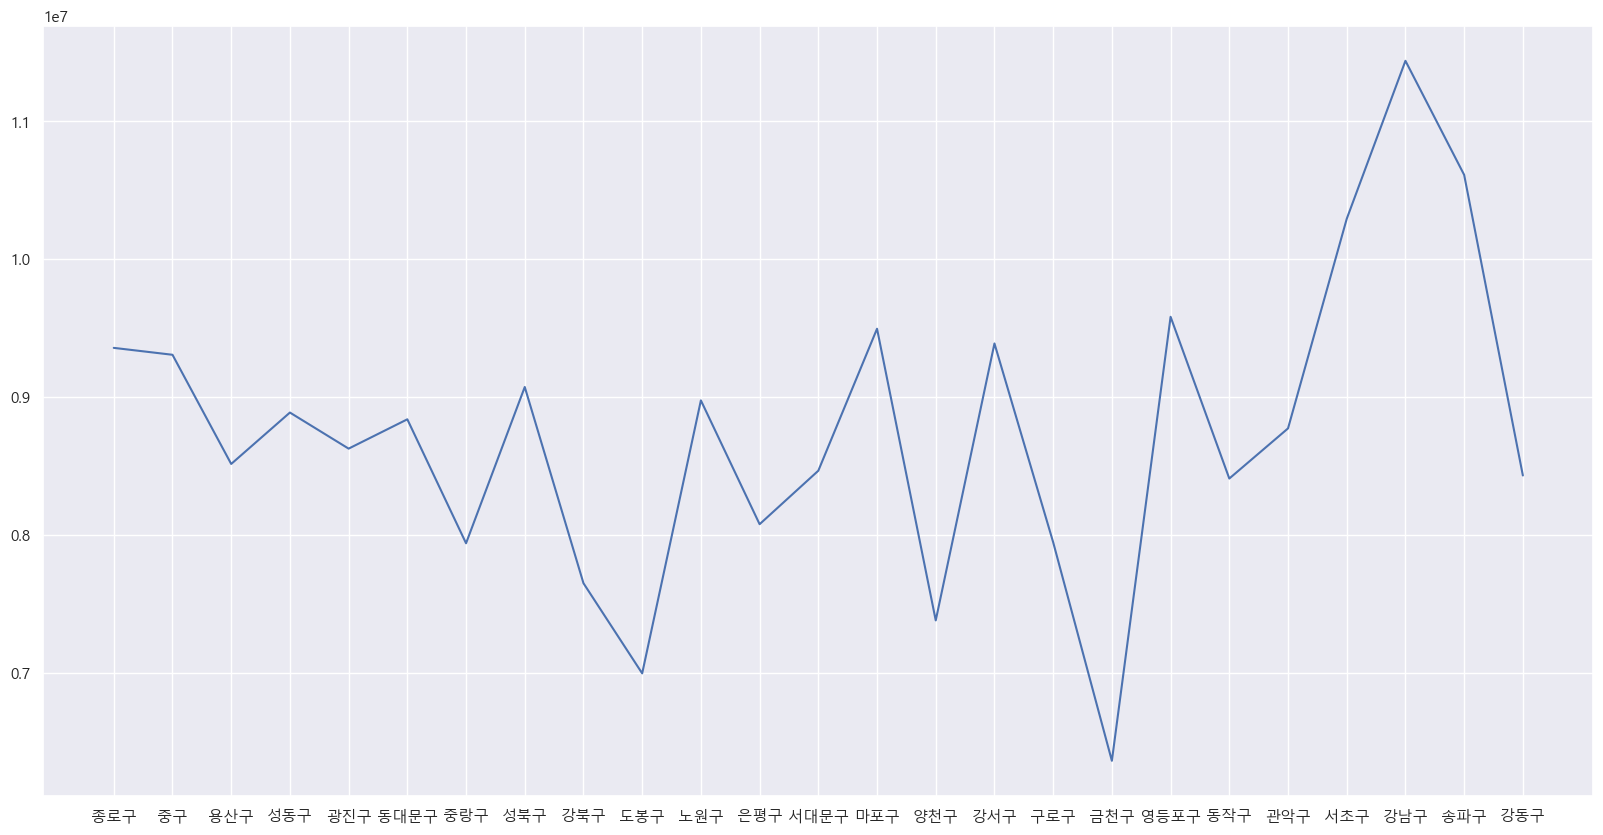

In [ ]:
# 구별 총 이동 시간
plt.figure(figsize=(20,10))
plt.plot('자치구','총 이동 시간(분)',data=df_seoul_moving)

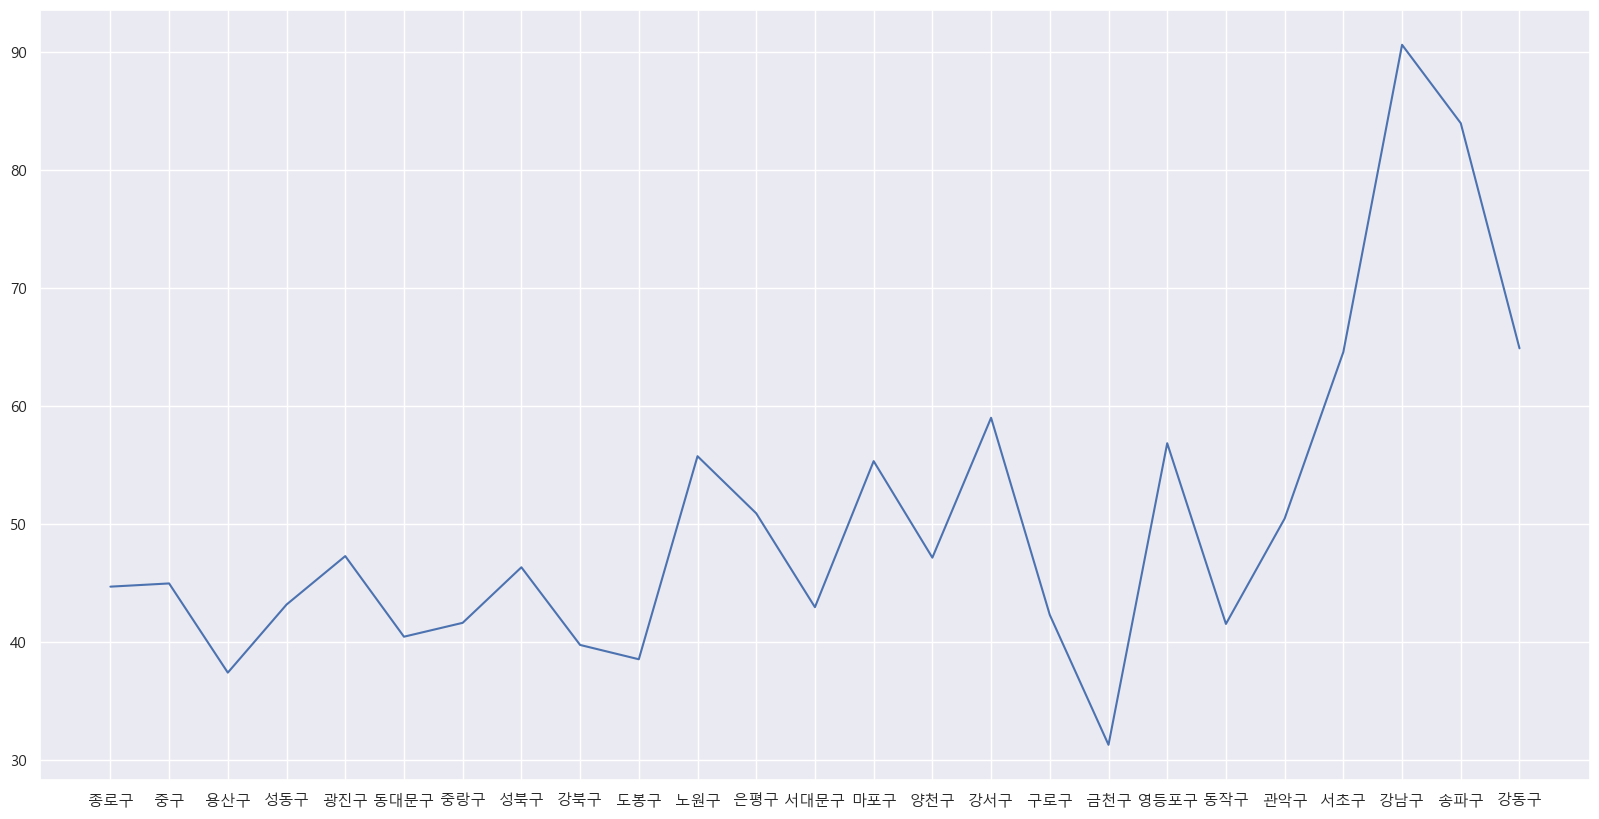

In [ ]:
# 구별 평균 이동인구
plt.figure(figsize=(20,10))
plt.plot('자치구','이동인구(평균)',data=df_seoul_moving)

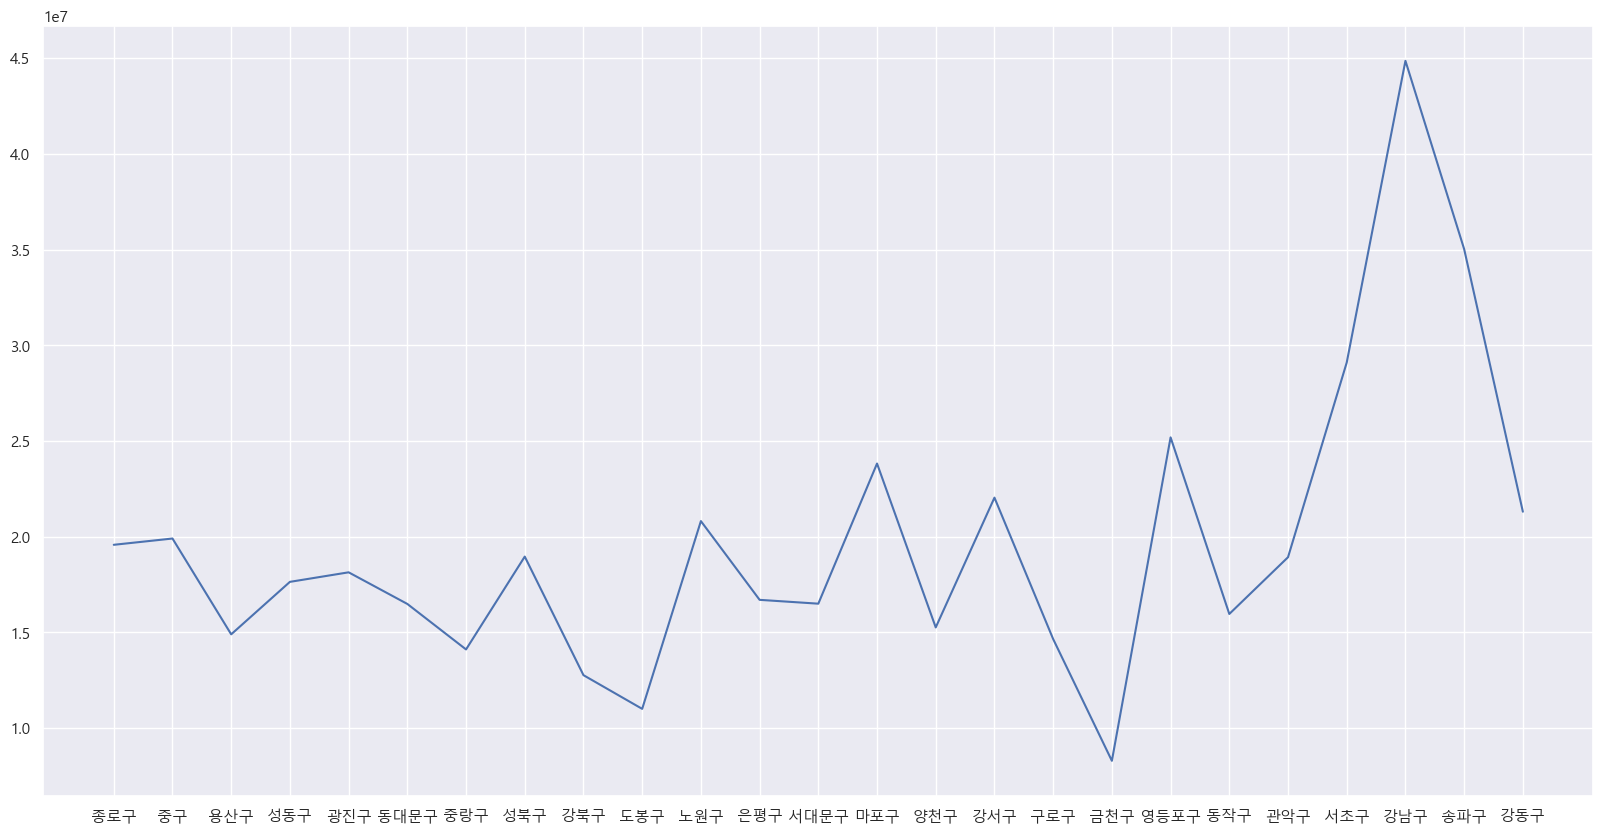

In [ ]:
# 구별 총 이동인구
plt.figure(figsize=(20,10))
plt.plot('자치구','이동인구(합)',data=df_seoul_moving)

Text(0.5, 1.0, '상관관계')

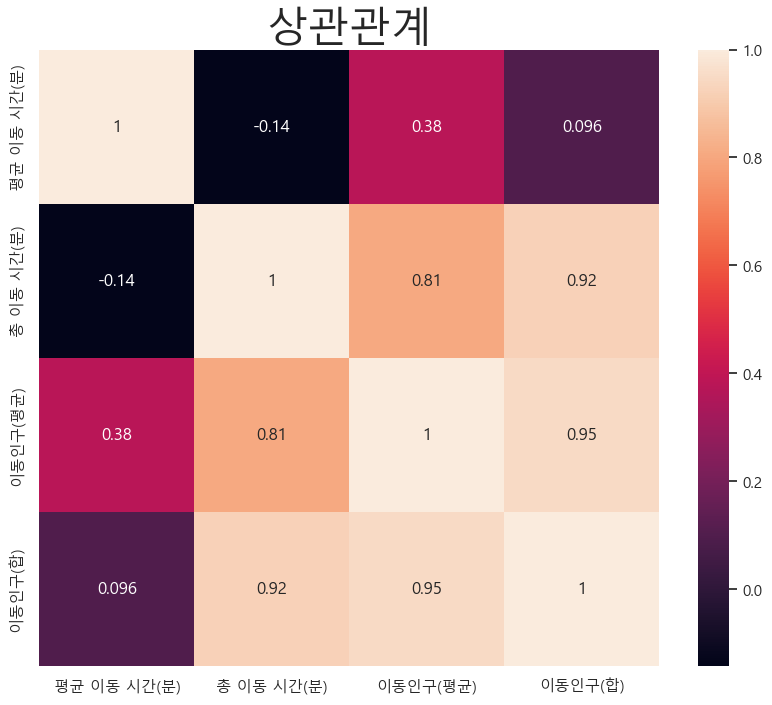

In [ ]:
# 속성별 상관관계
cor=df_seoul_moving.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot=True)
plt.title('상관관계', size=30)

In [44]:
# 해당 데이터프레임을 'df_seoul_moving.csv' 파일로 저장하세요
df_seoul_moving.to_csv("df_seoul_moving.csv", index = False)

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [ ]:
# 시각화, 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid') 

#### [실습문제10] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 유입과 유출은 강남,서초구에서 가장 많다.그러나 심야를 제외하면 강남,송파구에서 가장 많다. 서초구는 심야에 사람이 많다.
# 2. 여성이 남성보다 심야를 제외한 서울시에서의 유동인구가 더 많다.
# 3. 이동시간의 평균과 합의 상관관게는 작다.그러나 이동인구의 평균과 합의 상관관계는 크다.
# 4. 총 이동시간과 총 이동인구의 상관관계는 크다.즉 이동시간이 길면 이동인구가 많을 확률이 크다.

---